# Machine Learning with Python
# Part 4. Unsupervised Learning - Dimensionality Reduction

Author: Kang P. Lee<br>
References:
- Documentation scikit-learn (http://scikit-learn.org/stable/documentation.html)
- Introduction to Machine Learning with Python (http://shop.oreilly.com/product/0636920030515.do)

## Set the Goal

Let's aim to build a dimensionality redection model from the Wisconsin breast cancer diagnostic dataset that is able to effectively reduce the number of features, or dimensions, to only two, so that we can visualize the reduced data in a 2D plane. 

## Import Modules

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Load the Dataset into a Pandas Dataframe

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [5]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [6]:
cancer.target_names

array(['malignant', 'benign'], 
      dtype='<U9')

In [7]:
cancer.data[:5]

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02,
          1.00100000e+03,   1.18400000e-01,   2.77600000e-01,
          3.00100000e-01,   1.47100000e-01,   2.41900000e-01,
          7.87100000e-02,   1.09500000e+00,   9.05300000e-01,
          8.58900000e+00,   1.53400000e+02,   6.39900000e-03,
          4.90400000e-02,   5.37300000e-02,   1.58700000e-02,
          3.00300000e-02,   6.19300000e-03,   2.53800000e+01,
          1.73300000e+01,   1.84600000e+02,   2.01900000e+03,
          1.62200000e-01,   6.65600000e-01,   7.11900000e-01,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02,
          1.32600000e+03,   8.47400000e-02,   7.86400000e-02,
          8.69000000e-02,   7.01700000e-02,   1.81200000e-01,
          5.66700000e-02,   5.43500000e-01,   7.33900000e-01,
          3.39800000e+00,   7.40800000e+01,   5.22500000e-03,
          1.30800000e-02,   1.86000000e-02,   1.34000000e-02,
       

In [8]:
cancer.target[:5]

array([0, 0, 0, 0, 0])

In [9]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

## Say Hello to the Dataset

In [10]:
df.shape

(569, 30)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [12]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
df.head().T

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


## Prepare Data for Modeling

In [14]:
X = df.copy()

In [15]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

## Modeling with Principal Component Analysis (PCA)

In [16]:
# PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)

pca = PCA(n_components=2)     # k = 2

In [17]:
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
X_pca = pca.transform(X_scaled)

X_pca is a new dataset reduced from the original dataset X_scaled.

In [19]:
X_scaled.shape, X_pca.shape

((569, 30), (569, 2))

## Visualize the New Dataset with Reduced Dimensions

In [20]:
X_malignant = X_pca[cancer.target == 0]
X_benign = X_pca[cancer.target == 1]

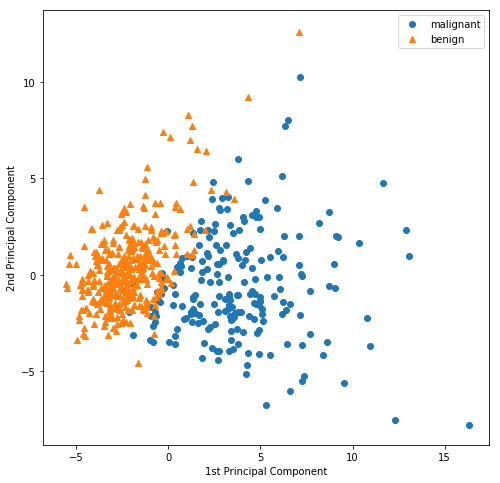

In [21]:
plt.figure(figsize=(8, 8))

# Draw a scatter plot for X_malignant
x1 = X_malignant[:, 0]     # the first dimension
x2 = X_malignant[:, 1]     # the second dimension 
plt.scatter(x1, x2, marker="o", label="malignant")

# Draw a scatter plot for X_benign 
x1 = X_benign[:, 0]       # the first dimension
x2 = X_benign[:, 1]       # the second dimension 
plt.scatter(x1, x2, marker="^", label="benign")

plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
legend()
plt.show()

You can see that the two classes separate quite well in this 2D space. You can also see that the malignant points are more spread out than the benign points. A downside of PCA is that the two new dimensions are often not easy to interpret. 